In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras import Sequential, layers
from tensorflow.keras.optimizers import Adam

In [ ]:
data_train_path = '/content/drive/MyDrive/Image_classification/Fruits_Vegetables/train'
data_test_path = '/content/drive/MyDrive/Image_classification/Fruits_Vegetables/test'
data_val_path = '/content/drive/MyDrive/Image_classification/Fruits_Vegetables/validation'

In [ ]:
img_width = 180
img_height =180

In [ ]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=64,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data_cat = data_train.class_names

In [ ]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=64,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [ ]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=64,
    validation_split=False
)

Found 359 files belonging to 36 classes.


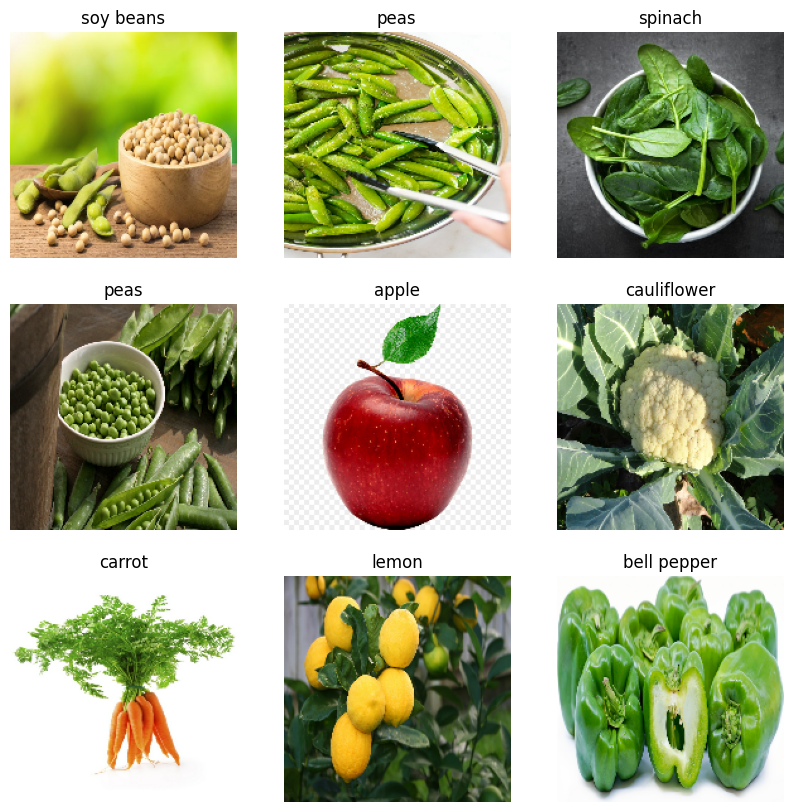

In [ ]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# model = Sequential([
#     layers.Rescaling(1./255),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32,3, padding='same',activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dropout(0.2),
#     layers.Dense(128),
#     layers.Dense(len(data_cat))

# ])

In [ ]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dense(len(data_train.class_names))
])

In [ ]:
# model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#epochs_size = 25
# history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

In [ ]:
# Set optimizer and compile the model
epochs_size = 15
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Adjust batch size
# Given that you're using Google Colab and your dataset size, you can try a larger batch size
batch_size = 64

# Train the model
history = model.fit(data_train,
                    validation_data=data_val,
                    epochs=epochs_size,
                    batch_size=batch_size)

Epoch 1/15
49/49 [==============================] - 722s 15s/step - loss: 3.3971 - accuracy: 0.0774 - val_loss: 2.6870 - val_accuracy: 0.2365
Epoch 2/15
49/49 [==============================] - 317s 6s/step - loss: 2.5465 - accuracy: 0.2629 - val_loss: 1.8034 - val_accuracy: 0.5100
Epoch 3/15
49/49 [==============================] - 318s 6s/step - loss: 2.0898 - accuracy: 0.3907 - val_loss: 1.4099 - val_accuracy: 0.6182
Epoch 4/15
49/49 [==============================] - 314s 6s/step - loss: 1.7459 - accuracy: 0.4770 - val_loss: 1.0328 - val_accuracy: 0.7179
Epoch 5/15
49/49 [==============================] - 321s 6s/step - loss: 1.3896 - accuracy: 0.5778 - val_loss: 0.7728 - val_accuracy: 0.8262
Epoch 6/15
49/49 [==============================] - 311s 6s/step - loss: 1.0742 - accuracy: 0.6722 - val_loss: 0.4984 - val_accuracy: 0.8946
Epoch 7/15
49/49 [==============================] - 321s 6s/step - loss: 0.7599 - accuracy: 0.7637 - val_loss: 0.3553 - val_accuracy: 0.9117
Epoch 8/15
4

Text(0.5, 1.0, 'Loss')

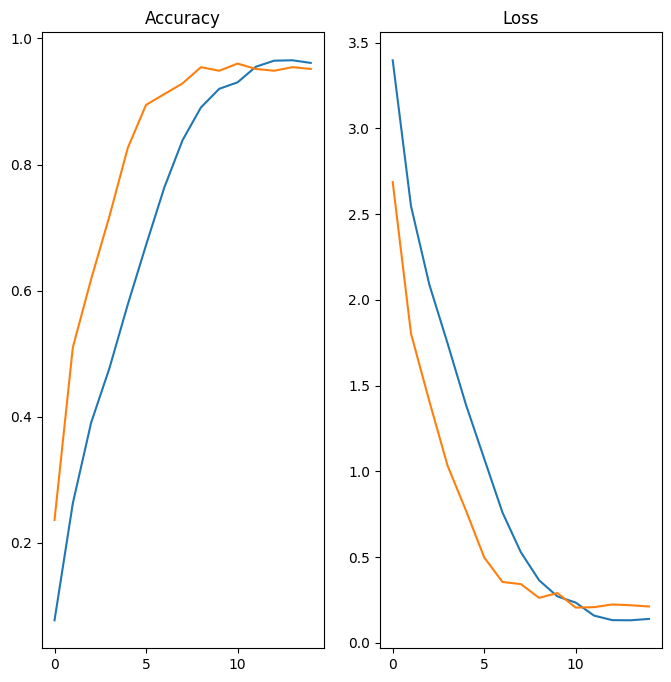

In [ ]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [ ]:
image = '/content/drive/MyDrive/Image_classification/cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [ ]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 226ms/step


In [ ]:
score = tf.nn.softmax(predict)

In [ ]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is lettuce with accuracy of 93.04


In [ ]:
def calculate_macs(model):
    macs = 0
    input_shape = (180, 180, 3)
    for layer in model.layers:
        if isinstance(layer, layers.Conv2D):
            kernel_size = layer.kernel_size[0] * layer.kernel_size[1]
            output_shape = layer.output_shape[1:]
            macs += (kernel_size * input_shape[2] * output_shape[2]) * output_shape[0] * output_shape[1]
            input_shape = output_shape
        elif isinstance(layer, layers.Dense):
            input_size = input_shape[0]
            output_size = layer.units
            macs += input_size * output_size
            input_shape = (output_size,)
    return macs

macs = calculate_macs(model)

In [ ]:
!pip install nvidia-ml-py

In [ ]:
import time
import psutil
import pynvml

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def get_cpu_info():
    # Memory information
    mem_info = psutil.virtual_memory()
    print("Memory Information (Total):", "{:.2f}".format(mem_info.total / (1024 ** 2)), "MB")
    print("Memory Information (Used):", "{:.2f}".format(mem_info.used / (1024 ** 2)), "MB")
    print("Memory Information (Free):", "{:.2f}".format(mem_info.free / (1024 ** 2)), "MB")

    # CPU temperature (if available)
    try:
        cpu_temp = psutil.sensors_temperatures()['cpu-thermal'][0].current
        print("CPU Temperature:", cpu_temp, "°C")
    except KeyError:
        print("CPU Temperature information not available.")

    # CPU power usage
    cpu_power_usage = psutil.cpu_percent() / 100 * psutil.cpu_count() * psutil.cpu_freq().current  # in Watts
    print("CPU Power Usage:", "{:.2f}".format(cpu_power_usage), "W")

    start_time = time.time()
    # Estimate CPU energy usage
    cpu_time = time.time()
    cpu_energy_usage = cpu_power_usage * (cpu_time - start_time)  # in Joules
    print("CPU Energy Usage:", "{:.2f}".format(cpu_energy_usage), "J")

    # Calculate power
    print("Power calculated:", "{:2f}".format(cpu_energy_usage / cpu_time))

# Call the function to get CPU information
get_cpu_info()


Memory Information (Total): 12978.98 MB
Memory Information (Used): 2583.19 MB
Memory Information (Free): 7852.89 MB
CPU Temperature information not available.
CPU Power Usage: 1042.91 W
CPU Energy Usage: 0.00 J
Power calculated: 0.000000


In [ ]:
def get_current_energy():
    start_time = time.time()
    # Get CPU energy usage
    cpu_energy_usage = psutil.cpu_percent() / 100 * psutil.cpu_count() * psutil.cpu_freq().current  # in Watts
    cpu_energy_usage = cpu_energy_usage * (time.time() - start_time)
    return cpu_energy_usage

def print_res(macs, time_beg, time_end, energy_beg, energy_end):
    Total_Energy = energy_end - energy_beg
    Total_Time = time_end - time_beg
    print("Energy:", "{:.2f}".format(Total_Energy), "J")  # Energy is already in Joules
    print("Time:", "{:.2f}".format(Total_Time), "S")
    print("GOP/s/W:", "{:.2f}".format((2500 * macs / (1024 ** 3)) / Total_Energy))
    print("GOP/s:", "{:.2f}".format((2500 * macs / (1024 ** 3)) / Total_Time))
    print("Power:", "{:.2f}".format(Total_Energy / Total_Time), "W")

In [ ]:
energy_beg = get_current_energy()
time_beg = time.time()

image = '/content/drive/MyDrive/Image_classification/cabbage.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

time_end = time.time()
energy_end = get_current_energy()

print_res(macs, time_beg, time_end, energy_beg, energy_end)

1/1 [==============================] - 0s 56ms/step
Veg/Fruit in image is lettuce with accuracy of 93.04
Energy: 1.14 J
Time: 0.13 S
GOP/s/W: 665.82
GOP/s: 5893.90
Power: 8.85 W


In [ ]:
model.save('Image_classify.keras')